In [1]:
import pandas as pd

df = pd.read_csv("metrics.csv")

In [2]:
df.head()

,CT,DICE_panc,DICE_kidn,DICE_livr,CONF_panc,CONF_kidn,CONF_livr,Entropy_GT,Entropy_Pred,Hausdorff_1,...,EAURC_kidn,EAURC_livr,CRPS_panc,CRPS_kidn,CRPS_livr,NCC_GT1-2,NCC_GT1-3,NCC_GT2-3,NCC_mean,Patient_ID
0,ensemble_anno3,0.848202,0.980637,0.964536,0.962211,0.994686,0.976608,0.330484,0.328703,28.178006,...,0.101876,0.021122,4897.276393,21028.398400,95290.595493,0.979107,0.976647,0.989421,0.981725,UKCHLL003
1,ensemble_all,0.896408,0.979192,0.970718,0.971881,0.991845,0.983543,0.330484,0.327702,23.280893,...,0.111341,0.018298,2796.080487,2320.094887,63029.720669,0.979107,0.976647,0.989421,0.981725,UKCHLL003
2,ensemble_anno1,0.875454,0.968423,0.961976,0.966369,0.985955,0.985578,0.330484,0.323390,17.549929,...,0.132543,0.021263,8227.224718,22170.494557,78148.515817,0.979107,0.976647,0.989421,0.981725,UKCHLL003
3,ensemble_anno2,0.943948,0.981796,0.977081,0.987064,0.994893,0.988442,0.330484,0.330600,26.248809,...,0.118888,0.018298,2234.973704,4690.604776,20936.826625,0.979107,0.976647,0.989421,0.981725,UKCHLL003
4,anno3_init445566_foldall,0.847489,0.980800,0.978574,0.970964,0.994357,0.990379,0.330484,0.331306,21.794495,...,0.114061,0.026088,2796.080487,6156.354727,9032.805466,0.979107,0.976647,0.989421,0.981725,UKCHLL003


In [3]:
df.CT.unique()

array(['ensemble_anno3', 'ensemble_all', 'ensemble_anno1',
       'ensemble_anno2', 'anno3_init445566_foldall',
       'anno2_init112233_foldall', 'anno1_init112233_foldall',
       'anno1_init778899_foldall', 'anno2_init445566_foldall',
       'anno3_init778899_foldall', 'anno1_init445566_foldall',
       'anno3_init112233_foldall', 'anno2_init778899_foldall'],
      dtype=object)

In [4]:
!pip install plotly

   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ----- ---------------------------------- 2.4/16.1 MB 11.9 MB/s eta 0:00:02
   ------------ --------------------------- 5.0/16.1 MB 11.8 MB/s eta 0:00:01
   ----------------- ---------------------- 7.1/16.1 MB 11.6 MB/s eta 0:00:01
   ----------------------- ---------------- 9.4/16.1 MB 11.5 MB/s eta 0:00:01
   ----------------------------- ---------- 11.8/16.1 MB 11.5 MB/s eta 0:00:01
   ----------------------------------- ---- 14.4/16.1 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------- 16.1/16.1 MB 11.4 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ----------

In [ ]:
import pandas as pd
import plotly.express as px

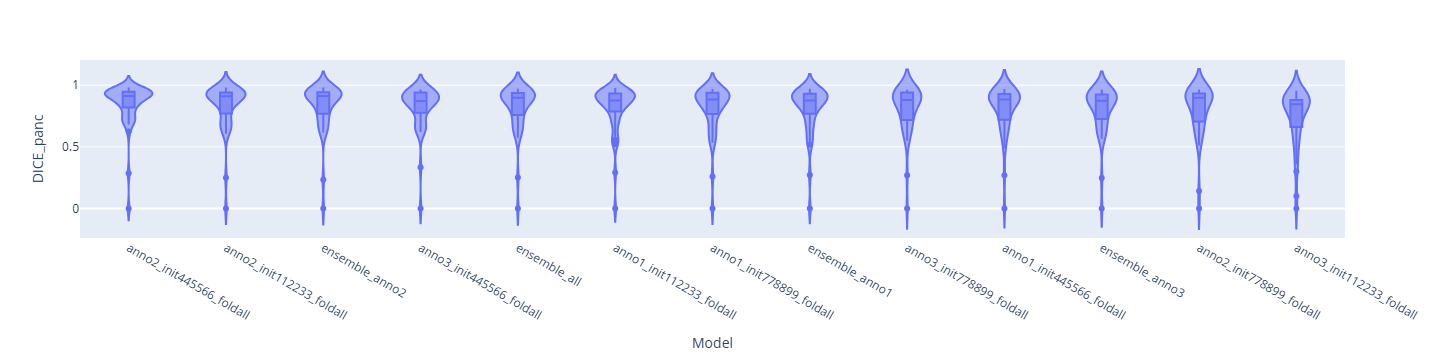

In [24]:
ordered_ct = df.groupby("CT")["DICE_panc"].mean().sort_values(ascending=False).index

fig = px.violin(df, 
                x="CT", 
                y="DICE_panc", 
                category_orders={"CT": ordered_ct},  # tri personnalisé
                box=True,
               )

fig.update_layout(xaxis_title="Model",
                  yaxis_title="DICE_panc")
fig.show()

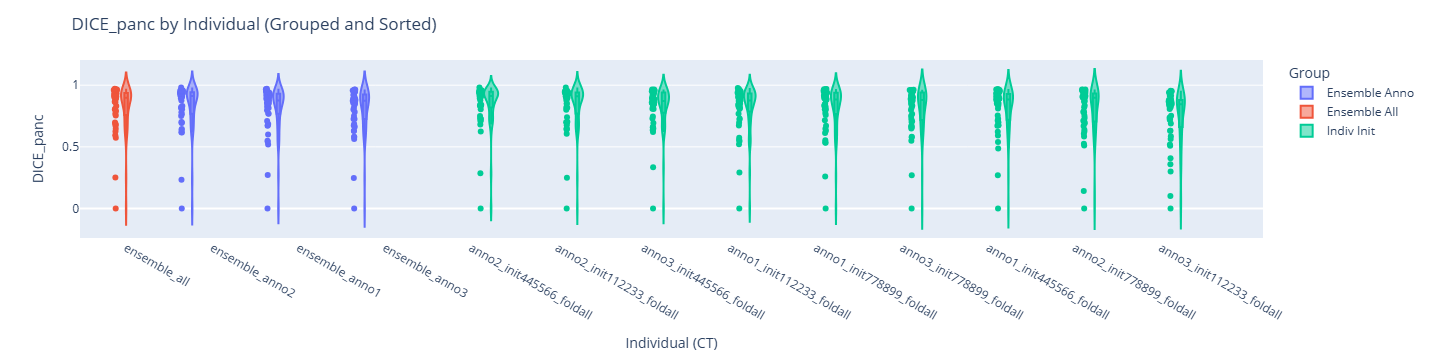

In [34]:
import pandas as pd
import plotly.express as px

# Créer une copie de df pour ne pas modifier l'original
df_plot = df.copy()

# Définir les groupes
def assign_group(ct):
    if ct == 'ensemble_all':
        return 'Ensemble All'
    elif ct.startswith('ensemble_anno'):
        return 'Ensemble Anno'
    else:
        return 'Indiv Init'

# Ajouter la colonne Group
df_plot["Group"] = df_plot["CT"].apply(assign_group)

# Trier les CT par groupe puis par moyenne DICE_panc
ordered_ct = (
    df_plot.groupby(["Group", "CT"])["DICE_panc"]
    .mean()
    .reset_index()
    .sort_values(by=["Group", "DICE_panc"], ascending=[True, False])
)["CT"].tolist()

# Tracer le graphique
fig = px.violin(df_plot, 
                x="CT", 
                y="DICE_panc", 
                color="Group", 
                category_orders={"CT": ordered_ct},
                box=True, 
                points="all"
               )

fig.update_layout(title="DICE_panc by Individual (Grouped and Sorted)",
                  xaxis_title="Individual (CT)",
                  yaxis_title="DICE_panc")
fig.show()


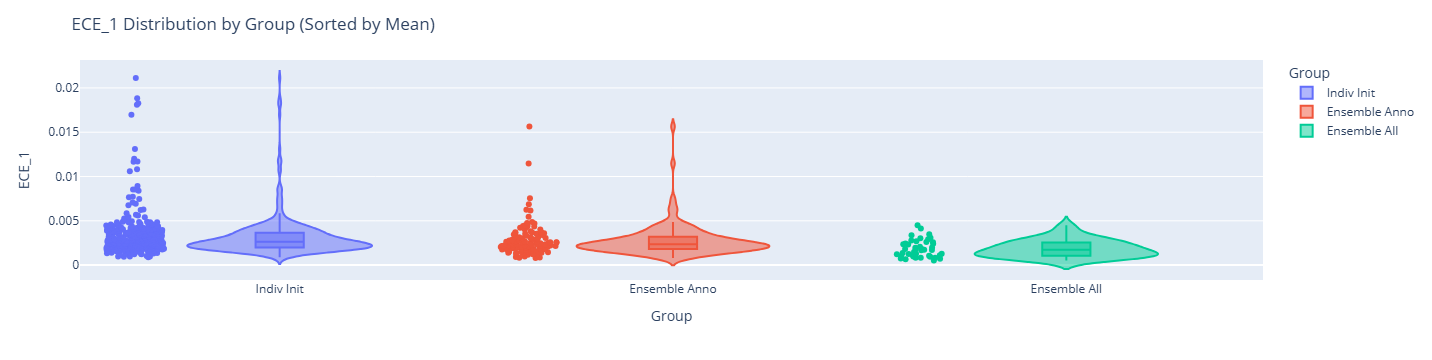

In [58]:


# Créer une copie de df
df_plot = df.copy()

# Attribuer les groupes
def assign_group(ct):
    if ct == 'ensemble_all':
        return 'Ensemble All'
    elif ct.startswith('ensemble_anno'):
        return 'Ensemble Anno'
    else:
        return 'Indiv Init'

df_plot["Group"] = df_plot["CT"].apply(assign_group)

# Calculer la moyenne par groupe et trier
ordered_groups = (
    df_plot.groupby("Group")["ECE_1"]
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

# Plot avec tri personnalisé
fig = px.violin(df_plot, 
                x="Group", 
                y="ECE_1", 
                color="Group", 
                category_orders={"Group": ordered_groups},
                box=True, 
                points="all"
               )

fig.update_layout(title="ECE_1 Distribution by Group (Sorted by Mean)",
                  xaxis_title="Group",
                  yaxis_title="ECE_1")
fig.show()


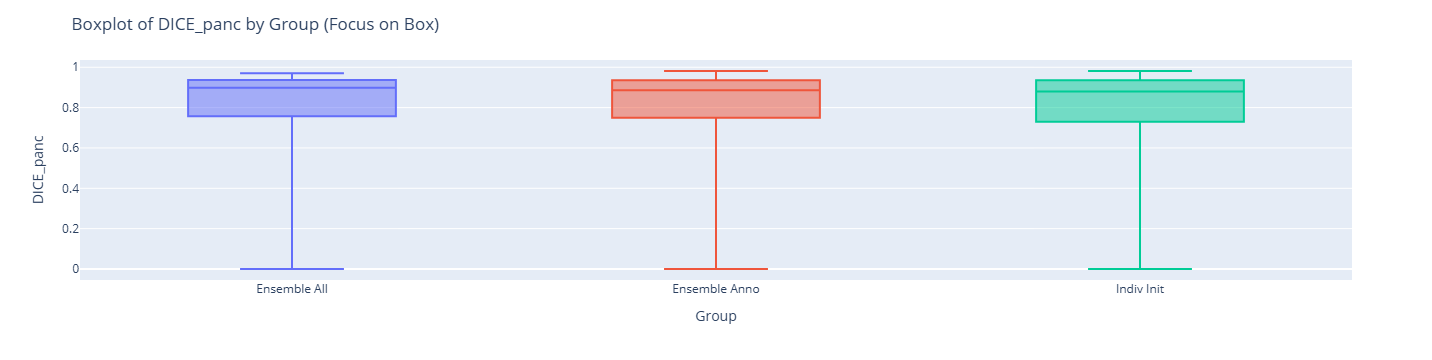

In [55]:
import pandas as pd
import plotly.express as px

# Création du DataFrame de travail
df_plot = df.copy()
def assign_group(ct):
    if ct == 'ensemble_all':
        return 'Ensemble All'
    elif ct.startswith('ensemble_anno'):
        return 'Ensemble Anno'
    else:
        return 'Indiv Init'
df_plot["Group"] = df_plot["CT"].apply(assign_group)

# Tri des groupes par moyenne
ordered_groups = (
    df_plot.groupby("Group")["DICE_panc"]
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

# Boxplot sans points, trié
fig = px.box(df_plot, 
             x="Group", 
             y="DICE_panc", 
             category_orders={"Group": ordered_groups},
             color="Group", 
             width=600,
             points=False)  # Ne pas afficher les outliers

# Affiner le layout pour se concentrer sur les boîtes
fig.update_layout(
    title="Boxplot of DICE_panc by Group (Focus on Box)",
    xaxis_title="Group",
    yaxis_title="DICE_panc",
    showlegend=False
)

# Optionnel : réduire les marges verticales
fig.update_traces(marker=dict(size=3))

fig.show()


In [56]:
df.columns

Index(['CT', 'DICE_panc', 'DICE_kidn', 'DICE_livr', 'CONF_panc', 'CONF_kidn',
       'CONF_livr', 'Entropy_GT', 'Entropy_Pred', 'Hausdorff_1', 'Hausdorff_2',
       'Hausdorff_3', 'ECE_1', 'ECE_2', 'ECE_3', 'ACE_1', 'ACE_2', 'ACE_3',
       'AUROC_panc', 'AUROC_kidn', 'AUROC_livr', 'AURC_panc', 'AURC_kidn',
       'AURC_livr', 'EAURC_panc', 'EAURC_kidn', 'EAURC_livr', 'CRPS_panc',
       'CRPS_kidn', 'CRPS_livr', 'NCC_GT1-2', 'NCC_GT1-3', 'NCC_GT2-3',
       'NCC_mean', 'Patient_ID'],
      dtype='object')